# Access Data for Hackathon


## Pull data from IBM Object Storage to your local machine

The data are stored in containers on IBM Object Storage. You can access these data with HTTP calls. 

Data processing should take longer than reading the files from the network to Object Storage, so this should not create a bottleneck in your overall workflow on Spark Enterprise.

In [1]:
# Install ibmseti library. Important - make sure you upgrade
!pip install --user --upgrade ibmseti

Requirement already up-to-date: ibmseti in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s18f-42b3305d048694-5fca760d00b1/.local/lib/python2.7/site-packages
Requirement already up-to-date: requests>=2.9.1 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s18f-42b3305d048694-5fca760d00b1/.local/lib/python2.7/site-packages (from ibmseti)
Requirement already up-to-date: numpy>=1.10 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s18f-42b3305d048694-5fca760d00b1/.local/lib/python2.7/site-packages (from ibmseti)
Requirement already up-to-date: six>=1.10.0 in /usr/local/src/bluemix_jupyter_bundle.v46/notebook/lib/python2.7/site-packages (from ibmseti)
Requirement already up-to-date: scipy>=0.14.0 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s18f-42b3305d048694-5fca760d00b1/.local/lib/python2.7/site-packages (from ibmseti)
Requirement already up-to-date: idna<2.6,>=2.5 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s18f-42b3305d048694-5fca760d00b1/.local/lib/python2.7/site-packages (fro

In [2]:
import os
import zipfile
import ibmseti

In [2]:
### SET YOUR TEAM NAME HERE! Use this folder to save intermediate results
mydatafolder = 'machine_contact_png' #<TEAM NAME HERE>
mydatafolder = os.path.join( os.environ['PWD'], mydatafolder )  #Change my_data_folder to your team name
if os.path.exists(mydatafolder) is False:
    os.makedirs(mydatafolder)

base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'

basic_container = 'simsignals_basic_v2'
basic4_zip_file = 'basic4.zip'
basic_csv_container = 'simsignals_files'
basic4_csv_file = 'public_list_basic_v2_26may_2017.csv'

testset_container = 'simsignals_basic_v2_test'
testset_zip_file = 'basic4_test.zip'
testset_csv_container = 'simsignals_files'
testset_csv_file = 'public_list_basic_testset_1june_2017.csv'

In [3]:
os.system('curl {}/{}/{} > {}'.format(base_url, basic_container, basic4_zip_file, mydatafolder + '/' + basic4_zip_file))
os.system('curl {}/{}/{} > {}'.format(base_url, basic_csv_container, basic4_csv_file, mydatafolder + '/' + basic4_csv_file))

0

In [4]:
os.system('curl {}/{}/{} > {}'.format(base_url, testset_container, testset_zip_file, mydatafolder + '/' + testset_zip_file))
os.system('curl {}/{}/{} > {}'.format(base_url, testset_csv_container, testset_csv_file, mydatafolder + '/' + testset_csv_file))

0

In [5]:
!ls -al "$mydatafolder"

total 4897200
drwx------ 5 s18f-42b3305d048694-5fca760d00b1 users       4096 Jun 10 15:26 .
drwxr-xr-x 7 s18f-42b3305d048694-5fca760d00b1 users       8192 Jun 10 15:16 ..
-rw------- 1 s18f-42b3305d048694-5fca760d00b1 users  514820462 Jun 10 15:26 basic4_test.zip
-rw------- 1 s18f-42b3305d048694-5fca760d00b1 users 1157840757 Jun 10 15:25 basic4.zip
drwx------ 2 s18f-42b3305d048694-5fca760d00b1 users     262144 Jun 10 15:20 data
drwx------ 2 s18f-42b3305d048694-5fca760d00b1 users       4096 Jun 10 15:19 png
-rw------- 1 s18f-42b3305d048694-5fca760d00b1 users      66531 Jun 10 15:26 public_list_basic_testset_1june_2017.csv
-rw------- 1 s18f-42b3305d048694-5fca760d00b1 users     188027 Jun 10 15:25 public_list_basic_v2_26may_2017.csv
drwx------ 2 s18f-42b3305d048694-5fca760d00b1 users       4096 Jun 10 13:45 zipfiles


## Access data in notebook

In [7]:
zz = zipfile.ZipFile(mydatafolder + '/' + 'basic4.zip')
basic4list = zz.namelist()[1:]
firstfile = basic4list[0]
aca = ibmseti.compamp.SimCompamp(zz.open(firstfile).read())
aca.header() # this shows the classification

{u'signal_classification': u'narrowbanddrd',
 u'uuid': u'001b4fbd-bfbc-49e0-83a8-8b3c5b8b303d'}

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

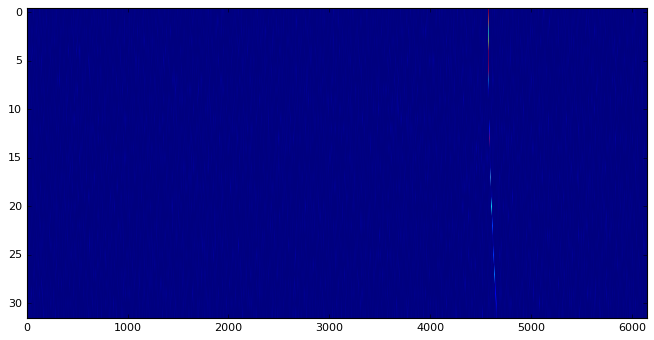

In [11]:
spectrogram = aca.get_spectrogram()
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(spectrogram,  aspect = 0.5*float(spectrogram.shape[1]) / spectrogram.shape[0])

{u'signal_classification': u'narrowband', u'uuid': u'0742bb44-8e19-4276-832b-161a9c600066'}


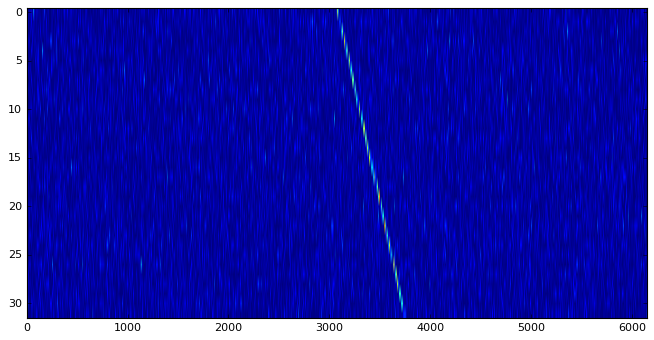

In [12]:
firstfile = basic4list[100]
aca = ibmseti.compamp.SimCompamp(zz.open(firstfile).read())
print(aca.header())
spectrogram = aca.get_spectrogram()
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(spectrogram,  aspect = 0.5*float(spectrogram.shape[1]) / spectrogram.shape[0])

{u'signal_classification': u'squiggle', u'uuid': u'4f6d3736-67d8-4042-9c82-d522303af2ce'}


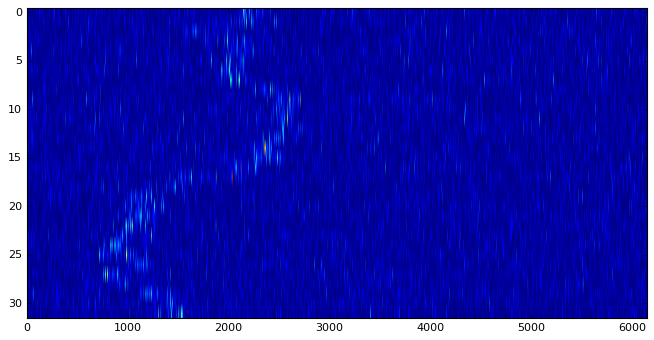

In [23]:
firstfile = basic4list[1200]
aca = ibmseti.compamp.SimCompamp(zz.open(firstfile).read())
print(aca.header())
spectrogram = aca.get_spectrogram()
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(spectrogram,  aspect = 0.5*float(spectrogram.shape[1]) / spectrogram.shape[0])

{u'signal_classification': u'noise', u'uuid': u'a377f274-1847-43d2-a730-77814cf2c74a'}


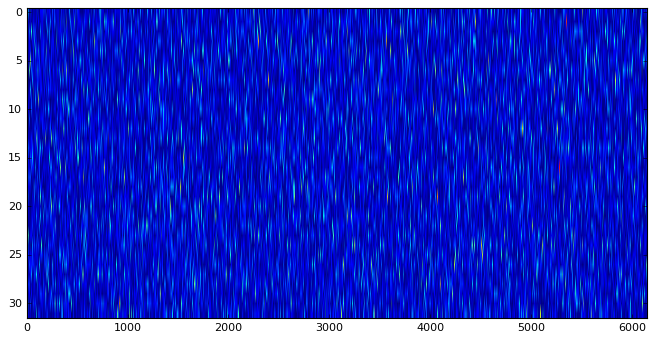

In [17]:
firstfile = basic4list[2500]
aca = ibmseti.compamp.SimCompamp(zz.open(firstfile).read())
print(aca.header())
spectrogram = aca.get_spectrogram()
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(spectrogram,  aspect = 0.5*float(spectrogram.shape[1]) / spectrogram.shape[0])

In [24]:
firstfile = basic4list[1200]
aca = ibmseti.compamp.SimCompamp(zz.open(firstfile).read())
print(aca.header())
spectrogram = aca.get_spectrogram()
print(np.mean(spectrogram))
spectrogram = (spectrogram - np.mean(spectrogram)) / np.std(spectrogram)
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(spectrogram,  aspect = 0.5*float(spectrogram.shape[1]) / spectrogram.shape[0])

{u'signal_classification': u'squiggle', u'uuid': u'4f6d3736-67d8-4042-9c82-d522303af2ce'}
2145960.38956


NameError: name 'spectrogam' is not defined